In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from scipy import stats
import plotly.express as px
from datetime import datetime
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
pd.options.display.max_columns = None

In [3]:
df1 = pd.read_csv(r"C:\Users\Sambhav\Desktop\Website Docs\classifying defaults - RAI\loan_data_2007_2014_multimodel data.csv", header = 2,parse_dates = True)
df= df1.copy()
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,01/12/2011,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,27.65,0.0,01/01/1985,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,01/01/2015,171.62,NaN,01/01/2016,0.0,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,01/12/2011,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,1.00,0.0,01/04/1999,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,01/04/2013,119.66,NaN,01/09/2013,0.0,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,01/12/2011,Fully Paid,n,NaN,small_business,real estate business,8.72,0.0,01/11/2001,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,01/06/2014,649.91,NaN,01/01/2016,0.0,1,INDIVIDUAL,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_length                  445277 non-null  object 
 8   home_ownership              466285 non-null  object 
 9   annual_inc                  466281 non-null  float64
 10  verification_status         466285 non-null  object 
 11  issue_d                     466285 non-null  object 
 12  loan_status                 466285 non-null  object 
 13  pymnt_plan    

In [5]:
df.shape

(466285, 45)

In [6]:
def missing_data_summary(df, threshold=0):
    """
    Summarizes missing data, showing count and percentage of missing values for each column.
    Filters columns based on a missing percentage threshold.
    
    Parameters:
        df (pd.DataFrame): The dataframe to analyze.
        threshold (float): The minimum percentage of missing data to include in the summary.
    
    Returns:
        pd.DataFrame: A summary of missing data.
    """
    return (pd.DataFrame(df.isna().sum())
            .reset_index()
            .rename(columns={'index': 'Column', 0: 'mis_count'})
            .query('mis_count > 0')  # Only include columns with missing values
            .assign(Missing_Percentage=lambda x: x['mis_count'] / df.shape[0] * 100)
            .query(f'Missing_Percentage > {threshold}')  # Filter by threshold
            .sort_values('mis_count', ascending=False)
            .reset_index(drop=True))

missing = missing_data_summary(df,0)
missing

,Column,mis_count,Missing_Percentage
0,desc,340304,72.981975
1,mths_since_last_delinq,250351,53.690554
2,next_pymnt_d,227214,48.728567
3,emp_length,21008,4.505399
4,last_pymnt_d,376,0.080637
5,revol_util,340,0.072917
6,collections_12_mths_ex_med,145,0.031097
7,last_credit_pull_d,42,0.009007
8,total_acc,29,0.006219
9,open_acc,29,0.006219


In [7]:
df.value_counts("loan_status")

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [8]:
##Define the mapping
loan_status_mapping = {
    'Fully Paid': 0,
    'Current': 0,
    'In Grace Period': 0,
    'Does not meet the credit policy. Status:Fully Paid':0,
    'Late (16-30 days)': 1,
    'Late (31-120 days)': 1,
    'Charged Off': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Charged Off':1
}
## 1 - negative, 0 - positive

# Apply the mapping to the 'Loan_Status' column
df['loan_status_binary'] = df['loan_status'].map(loan_status_mapping)
df.drop('loan_status', axis=1, inplace=True)

df['loan_status_binary'].value_counts()

loan_status_binary
0    414099
1     52186
Name: count, dtype: int64

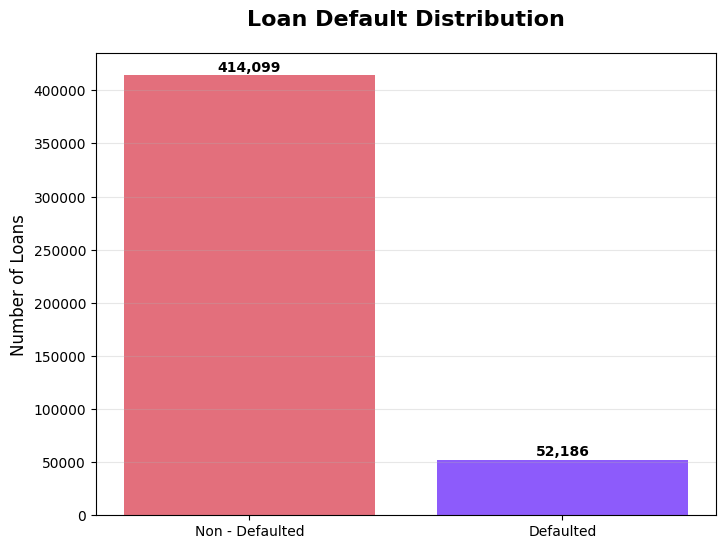

In [9]:
labels = ['Non - Defaulted', 'Defaulted']
values = [414099, 52186]
colors = ['#dc4b5b', '#7132fb'] 
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors, alpha=0.8)
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{value:,}', ha='center', va='bottom', fontweight='bold')
plt.title('Loan Default Distribution', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Loans', fontsize=12)
plt.grid(axis='y', alpha=0.3)

In [10]:
df.select_dtypes(include=['object']).head()

,term,grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,10+ years,RENT,Verified,01/12/2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,01/01/1985,f,01/01/2015,NaN,01/01/2016,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,01/12/2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,01/04/1999,f,01/04/2013,NaN,01/09/2013,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,01/12/2011,n,NaN,small_business,real estate business,01/11/2001,f,01/06/2014,NaN,01/01/2016,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,01/12/2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,01/02/1996,f,01/01/2015,NaN,01/01/2015,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,01/12/2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,01/01/1996,f,01/01/2016,01/02/2016,01/01/2016,INDIVIDUAL


In [11]:
print("issue_d dtype:", df['issue_d'].dtype)
print("earliest_cr_line dtype:", df['earliest_cr_line'].dtype)
print("last_pymnt_d dtype:", df['last_pymnt_d'].dtype)
print("last_credit_pull_d dtype:", df['last_credit_pull_d'].dtype)
print("next_pymnt_d dtype:", df['next_pymnt_d'].dtype)

issue_d dtype: object
earliest_cr_line dtype: object
last_pymnt_d dtype: object
last_credit_pull_d dtype: object
next_pymnt_d dtype: object


In [12]:
def get_sorted_unique_counts(df):
    # Select columns with categorical data
    object_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Get the number of unique entries in each categorical column
    object_nunique = {col: df[col].nunique() for col in object_cols}
    
    # Convert to DataFrame and sort by unique counts
    unique_counts = pd.DataFrame(list(object_nunique.items()), columns=['Column', 'Unique Count'])
    unique_counts = unique_counts.sort_values(by='Unique Count').reset_index(drop=True)
    
    return unique_counts

get_sorted_unique_counts(df)

,Column,Unique Count
0,application_type,1
1,term,2
2,pymnt_plan,2
3,initial_list_status,2
4,verification_status,3
5,home_ownership,6
6,grade,7
7,emp_length,11
8,purpose,14
9,issue_d,91


In [13]:
df.drop(['desc','title','application_type','pymnt_plan','policy_code'],axis =1,inplace = True)

In [14]:
get_sorted_unique_counts(df)

,Column,Unique Count
0,term,2
1,initial_list_status,2
2,verification_status,3
3,home_ownership,6
4,grade,7
5,emp_length,11
6,purpose,14
7,issue_d,91
8,last_pymnt_d,98
9,next_pymnt_d,100


In [15]:
def value_counter(df):
    value_series = pd.DataFrame()
    for col in df.select_dtypes(["object"]).columns:
        print(df[col].value_counts(dropna = False))

value_counter(df)

term
 36 months    337953
 60 months    128332
Name: count, dtype: int64
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64
emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
NaN           21008
9 years       17888
Name: count, dtype: int64
home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: count, dtype: int64
verification_status
Verified           168055
Source Verified    149993
Not Verified       148237
Name: count, dtype: int64
issue_d
01/10/2014    38782
01/07/2014    29306
01/11/2014    25054
01/05/2014    19099
01/04/2014    19071
              ...  
01/08/2007       74
01/07/2007       63
01/09/2008       57
01/09/2007       53
01/06/2007       24
Name: count, Length: 91, dt

In [16]:
df.select_dtypes(include=['number']).head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_status_binary
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,1
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0


In [17]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'])

print("last_credit_pull_d dtype:", df['last_credit_pull_d'].dtype)

last_credit_pull_d dtype: datetime64[ns]


In [18]:
date_cols = df.select_dtypes(include=['datetime64']).columns
df[date_cols].head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2011-01-12,1985-01-01,2015-01-01,NaT,2016-01-01
1,2011-01-12,1999-01-04,2013-01-04,NaT,2013-01-09
2,2011-01-12,2001-01-11,2014-01-06,NaT,2016-01-01
3,2011-01-12,1996-01-02,2015-01-01,NaT,2015-01-01
4,2011-01-12,1996-01-01,2016-01-01,2016-01-02,2016-01-01


In [19]:
df[date_cols].isna().sum()

issue_d                    0
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

In [20]:
# Assuming 'today' as the current date
today = pd.to_datetime("today")

#impute a today date to distinguish missing values.
df['last_pymnt_d'].fillna(today, inplace=True)
df['last_credit_pull_d'].fillna(today, inplace=True)

# Time differences
df['loan_age'] = (today - df['issue_d']).dt.days
df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df['time_since_last_payment'] = (today - df['last_pymnt_d']).dt.days
df['time_since_last_credit_pull'] = (today - df['last_credit_pull_d']).dt.days
df['month_on_books'] = ((df['issue_d'].dt.year - df['earliest_cr_line'].dt.year) * 12 + 
                        (df['issue_d'].dt.month - df['earliest_cr_line'].dt.month))

# Temporal components
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

# Categorical flags
df['recent_payment'] = (df['time_since_last_payment'] <= 30).astype(int)
df['recent_credit_pull'] = (df['time_since_last_credit_pull'] <= 90).astype(int)

drop = {'issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','next_pymnt_d'}
df.drop(drop,axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  purpose                      466285 non-null  object 
 12  dti                          466285 non-null  float64
 13 

In [21]:
df['term'] = df['term'].str.replace(' months', '').astype(int)

In [22]:
# First handle NaN values
df['emp_length'] = df['emp_length'].fillna('< 1 year')

# Clean the string values
df['emp_length'] = (
    df['emp_length']
    .str.replace(' years', '')
    .str.replace(' year', '')
    .str.replace('< 1', '0')
    .str.replace('10+', '10')  # converting 10+ to 11
)

# Convert to numeric (this will handle the conversion from string to numbers)
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')

In [23]:
df['emp_length'].value_counts()

emp_length
10    150049
0      57273
2      41373
3      36596
5      30774
1      29622
4      28023
7      26180
6      26112
8      22395
9      17888
Name: count, dtype: int64

In [24]:
df = df.drop('mths_since_last_delinq',axis =1)

In [25]:
categorical_cols = df.select_dtypes(include=['object'])
numerical_cols = df.select_dtypes(include=['number'])

In [26]:
missing_data_summary(df,0)

,Column,mis_count,Missing_Percentage
0,revol_util,340,0.072917
1,collections_12_mths_ex_med,145,0.031097
2,delinq_2yrs,29,0.006219
3,inq_last_6mths,29,0.006219
4,open_acc,29,0.006219
5,pub_rec,29,0.006219
6,total_acc,29,0.006219
7,acc_now_delinq,29,0.006219
8,credit_history_length,29,0.006219
9,month_on_books,29,0.006219


In [27]:
def value_counter_num(df):
    value_series = pd.DataFrame()
    for col in df.select_dtypes(["number"]).columns:
        print(df[col].value_counts(dropna = False))


In [28]:
numerical_cols.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
emp_length                       0
annual_inc                       4
dti                              0
delinq_2yrs                     29
inq_last_6mths                  29
open_acc                        29
pub_rec                         29
revol_bal                        0
revol_util                     340
total_acc                       29
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_ex_med     145
acc_now_delinq                  29
loan_status_binary  

In [29]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_status_binary,loan_age,credit_history_length,time_since_last_payment,time_since_last_credit_pull,month_on_books,issue_year,issue_month,recent_payment,recent_credit_pull
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,466256.000000,466285.000000,466285.000000,466256.000000,466285.000000,466285.000000,466256.000000,466285.000000,466285.0,466285.000000,466285.00000
mean,14317.277577,14291.801044,14222.329888,42.605334,13.829236,432.061201,5.723307,7.327738e+04,17.218758,0.284678,0.804745,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,0.004002,0.111919,4562.636950,5811.511166,3896.805615,3702.295993,190.917762,2013.138330,1.0,0.000806,0.00009
std,8286.509164,8274.371300,8297.637788,10.719040,4.357587,243.485550,3.756084,5.496357e+04,7.851121,0.797365,1.091598,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,0.068637,0.315267,429.766638,2668.446189,446.194923,350.262401,87.672944,1.176874,0.0,0.028385,0.00949
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.670000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4243.000000,6.000000,0.000000,0.000000,0.000000,2007.000000,1.0,0.000000,0.00000
25%,8000.000000,8000.000000,8000.000000,36.000000,10.990000,256.690000,2.000000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,0.000000,0.000000,4248.000000,4018.000000,3524.000000,3524.000000,132.000000,2013.000000,1.0,0.000000,0.00000
50%,12000.000000,12000.000000,12000.000000,36.000000,13.660000,379.890000,6.000000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,0.000000,0.000000,4254.000000,5468.000000,3878.000000,3524.000000,180.000000,2014.000000,1.0,0.000000,0.00000
75%,20000.000000,20000.000000,19950.000000,60.000000,16.490000,566.580000,10.000000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,0.000000,0.000000,4617.000000,7297.000000,3889.000000,3879.000000,240.000000,2014.000000,1.0,0.000000,0.00000
max,35000.000000,35000.000000,35000.000000,60.000000,26.060000,1409.990000,10.000000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,5.000000,1.000000,6806.000000,25570.000000,6800.000000,6807.000000,840.000000,2014.000000,1.0,1.000000,1.00000


In [30]:
categorical_cols

,grade,home_ownership,verification_status,purpose,initial_list_status
0,B,RENT,Verified,credit_card,f
1,C,RENT,Source Verified,car,f
2,C,RENT,Not Verified,small_business,f
3,C,RENT,Source Verified,other,f
4,B,RENT,Source Verified,other,f
...,...,...,...,...,...
466280,C,MORTGAGE,Source Verified,debt_consolidation,w
466281,D,MORTGAGE,Verified,debt_consolidation,f
466282,D,MORTGAGE,Verified,debt_consolidation,f
466283,A,OWN,Verified,credit_card,w


In [31]:
df['home_ownership'] = df['home_ownership'].replace(['OTHER', 'NONE', 'ANY'], 'OTHERS')

In [32]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHERS         233
Name: count, dtype: int64

In [33]:
# WOE

In [34]:
def process_categorical_columns(df, categorical_cols, target_col, woe_table=None, iv_summary=None, append=False):
    """
    Calculate WoE and IV for given categorical columns, including NaNs as a separate category.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        categorical_cols (list): List of categorical column names to process.
        target_col (str): Name of the binary target column (1 = Good, 0 = Bad).
        woe_table (pd.DataFrame): Existing WoE table (required if append=True).
        iv_summary (pd.DataFrame): Existing IV summary (required if append=True).
        append (bool): If True, append results to existing tables.
    
    Returns:
        woe_table (pd.DataFrame): WoE table with all processed columns.
        iv_summary (pd.DataFrame): IV summary table with all processed columns.
    """
    if append and (woe_table is None or iv_summary is None):
        raise ValueError("Existing tables must be provided when append=True.")
    
    # Initialize results if not appending
    if not append:
        woe_table = pd.DataFrame()
        iv_summary = pd.DataFrame()
    
    new_woe_results = []
    new_summary = []
    # Process each categorical column
    for col in categorical_cols:
        # Handle NaN values by creating a separate 'NaN' category
        df[col] = df[col].fillna('NaN')
        # event is count
        # Group by the column to calculate metrics
        stats = df.groupby(col).agg(
            event_count=(target_col, 'sum'),
            total_count=(target_col, 'count')
        ).reset_index()

        # Calculate non-event count and proportions
        stats['non_event_count'] = stats['total_count'] - stats['event_count']
        total_events = stats['event_count'].sum()
        total_non_events = stats['non_event_count'].sum()

        # Avoid division by zero
        stats['event_rate'] = stats['event_count'] / (total_events + 1e-6)
        stats['non_event_rate'] = stats['non_event_count'] / (total_non_events + 1e-6)

        # Calculate WoE
        stats['woe'] = np.log((stats['non_event_rate'] + 1e-6) / (stats['event_rate'] + 1e-6))
        
        # Calculate IV for each category
        stats['iv'] = (stats['non_event_rate'] - stats['event_rate']) * stats['woe']
        
        # Compute total IV for the column
        total_iv = stats['iv'].sum()
        # Add column name and rename for desired format
        stats['name'] = col  # Add column name
        stats.rename(columns={col: 'sub_name'}, inplace=True)  # Rename column to 'sub_name'
        
        # Reorder columns
        stats = stats[['name', 'sub_name', 'event_count', 'total_count', 'non_event_count', 
                       'event_rate', 'non_event_rate', 'woe', 'iv']]

        # Append results
        new_woe_results.append(stats)
        new_summary.append({'Column': col, 'IV': total_iv})

    # Combine results with existing tables if appending
    new_woe_table = pd.concat(new_woe_results, ignore_index=True)
    new_iv_summary = pd.DataFrame(new_summary).sort_values(by='IV', ascending=False)

    if append:
        woe_table = pd.concat([woe_table, new_woe_table], ignore_index=True)
        iv_summary = pd.concat([iv_summary, new_iv_summary], ignore_index=True).sort_values(by='IV', ascending=False)
    else:
        woe_table = new_woe_table
        iv_summary = new_iv_summary

    return woe_table, iv_summary
    

In [35]:
# Initial processing
categorical_cols = df.select_dtypes(include=['object']).columns
woe_table, iv_summary = process_categorical_columns(df, categorical_cols, 'loan_status_binary')

# Save initial results

iv_summary

,Column,IV
0,grade,0.293437
3,purpose,0.036797
4,initial_list_status,0.021992
2,verification_status,0.021113
1,home_ownership,0.020746


In [36]:
woe_table

,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
0,grade,A,2955,74867,71912,0.056624,0.173659,1.120642,0.131154
1,grade,B,11008,136929,125921,0.210938,0.304084,0.365740,0.034067
2,grade,C,14743,125293,110550,0.282509,0.266965,-0.056591,0.000880
3,grade,D,12132,76888,64756,0.232476,0.156378,-0.396509,0.030174
4,grade,E,7139,35757,28618,0.136799,0.069109,-0.682820,0.046220
5,grade,F,3267,13229,9962,0.062603,0.024057,-0.956360,0.036864
6,grade,G,942,3322,2380,0.018051,0.005747,-1.144322,0.014079
7,home_ownership,MORTGAGE,23247,235875,212628,0.445464,0.513471,0.142077,0.009662
8,home_ownership,OTHERS,46,233,187,0.000881,0.000452,-0.667745,0.000287
9,home_ownership,OWN,4643,41704,37061,0.088970,0.089498,0.005914,0.000003


In [37]:
woe_table.to_csv('woe_table.csv', index=False)
iv_summary.to_csv('iv_summary.csv', index=False)

In [38]:
y = df.loan_status_binary

In [39]:
correlation_df = numerical_cols.drop('loan_status_binary',axis=1).corrwith(y).sort_values().abs()
correlation_df.columns= ['Variable','correlation']
correlation_df

total_rec_prncp                0.254255
total_pymnt_inv                0.194638
total_pymnt                    0.193977
last_pymnt_amnt                0.170164
out_prncp                      0.150442
out_prncp_inv                  0.150430
issue_year                     0.077592
annual_inc                     0.049484
credit_history_length          0.046608
month_on_books                 0.046575
total_rec_int                  0.022833
total_acc                      0.022366
emp_length                     0.020828
revol_bal                      0.018536
pub_rec                        0.008279
open_acc                       0.005270
collections_12_mths_ex_med     0.004126
acc_now_delinq                 0.000083
recent_credit_pull             0.000931
delinq_2yrs                    0.002872
funded_amnt_inv                0.008686
funded_amnt                    0.012401
loan_amnt                      0.013181
installment                    0.015347
dti                            0.049092


In [40]:
threshold = 0.7
high_corr_pairs = numerical_cols.corr().abs().stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > threshold]
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs

,Feature1,Feature2,Correlation
1,loan_amnt,funded_amnt,0.998548
2,loan_amnt,funded_amnt_inv,0.994347
5,loan_amnt,installment,0.949666
18,loan_amnt,total_pymnt,0.743841
19,loan_amnt,total_pymnt_inv,0.743580
21,loan_amnt,total_rec_int,0.715876
37,funded_amnt,loan_amnt,0.998548
39,funded_amnt,funded_amnt_inv,0.996125
42,funded_amnt,installment,0.951787
55,funded_amnt,total_pymnt,0.743363


In [41]:
# Get variables to remove (avoiding duplicates)
variables_to_remove = set()

# Sort by correlation descending to handle strongest correlations first
high_corr_pairs = high_corr_pairs.sort_values('Correlation', ascending=False)

for _, row in high_corr_pairs.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']
    
    # If neither feature is already marked for removal, remove the second one
    if feature1 not in variables_to_remove and feature2 not in variables_to_remove:
        variables_to_remove.add(feature2)

print("Variables to remove (to avoid multicollinearity):")
print("=" * 50)
for var in sorted(variables_to_remove):
    print(var)

print(f"\nTotal variables to remove: {len(variables_to_remove)}")

Variables to remove (to avoid multicollinearity):
collection_recovery_fee
credit_history_length
funded_amnt
funded_amnt_inv
installment
loan_age
loan_amnt
out_prncp_inv
total_pymnt_inv
total_rec_prncp

Total variables to remove: 10


In [42]:
# Create a dictionary for each categorical variable
woe_mappings = {}

# Group by variable name and create mapping dictionaries
for name, group in woe_table.groupby('name'):
    woe_mappings[name] = dict(zip(group['sub_name'], group['woe']))

# Display the created mappings
for var_name, mapping in woe_mappings.items():
    print(f"{var_name}: {mapping}")

grade: {'A': 1.1206417807553763, 'B': 0.3657401768572619, 'C': -0.0565910964446079, 'D': -0.39650895218932797, 'E': -0.6828204761952408, 'F': -0.9563595004956734, 'G': -1.1443217454585433}
home_ownership: {'MORTGAGE': 0.1420769552207183, 'OTHERS': -0.6677454459227901, 'OWN': 0.005913612481388639, 'RENT': -0.15848180350174393}
initial_list_status: {'f': -0.10244408770380817, 'w': 0.21507139152469837}
purpose: {'car': 0.23719673092907792, 'credit_card': 0.26292854605081256, 'debt_consolidation': -0.04146837353731445, 'educational': -0.7368404350070998, 'home_improvement': 0.11829269989029774, 'house': -0.2717467482808638, 'major_purchase': 0.14966620805197323, 'medical': -0.21888626097472944, 'moving': -0.3776974697409329, 'other': -0.26382740767417384, 'renewable_energy': -0.36611536283959445, 'small_business': -0.8081897588239775, 'vacation': -0.10358675163654682, 'wedding': -0.09427197781258274}
verification_status: {'Not Verified': 0.17319316191048548, 'Source Verified': 0.0476267293

In [43]:
# Make a copy of your original dataframe to preserve the raw data
df_woe = df.copy()

# Replace each categorical variable with its WOE values
for var_name in woe_mappings.keys():
    if var_name in df_woe.columns:
        df_woe[var_name] = df_woe[var_name].map(woe_mappings[var_name])
        
        # Handle any missing values (categories not in WOE table)
        if df_woe[var_name].isnull().any():
            print(f"Warning: Some values in '{var_name}' not found in WOE table")
            # You can choose to fill with mean WOE, median, or specific value
            mean_woe = woe_df[woe_df['name'] == var_name]['woe'].mean()
            df_woe[var_name].fillna(mean_woe, inplace=True)

In [51]:
df_woe = df_woe.drop('issue_month',axis =1)

In [52]:
# removing features with high correlation
df_woe['loan_div_installment'] = df_woe['loan_amnt']/df_woe['installment']
drop = variables_to_remove
df_woe = df_woe.drop(drop, axis =1)


KeyError: 'loan_amnt'

In [ ]:
for column in df_woe.columns:
    if df_woe[column].isnull().any():
        df_woe[column] = df_woe[column].fillna(df[column].median())

In [53]:
df_woe

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_status_binary,time_since_last_payment,time_since_last_credit_pull,month_on_books,issue_year,recent_payment,recent_credit_pull,loan_div_installment
0,36,10.65,0.365740,10,-0.158482,24000.0,-0.172637,0.262929,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,-0.102444,0.00,5861.071414,861.07,0.00,0.00,171.62,0.0,0.0,0,3889,3524,312.0,2011,0,0,30.699331
1,60,15.27,-0.056591,0,-0.158482,30000.0,0.047627,0.237197,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,-0.102444,0.00,1008.710000,435.17,0.00,117.08,119.66,0.0,0.0,1,4616,4611,144.0,2011,0,0,41.785058
2,36,15.96,-0.056591,10,-0.158482,12252.0,0.173193,-0.808190,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,-0.102444,0.00,3003.653644,603.65,0.00,0.00,649.91,0.0,0.0,0,4249,3524,120.0,2011,0,0,28.459623
3,36,13.49,-0.056591,10,-0.158482,49200.0,0.047627,-0.263827,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,-0.102444,0.00,12226.302210,2209.33,16.97,0.00,357.48,0.0,0.0,0,3889,3889,180.0,2011,0,0,29.471575
4,60,12.69,0.365740,1,-0.158482,80000.0,0.047627,-0.263827,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,-0.102444,766.90,3242.170000,1009.07,0.00,0.00,67.79,0.0,0.0,0,3524,3524,180.0,2011,0,0,44.254315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60,14.47,-0.056591,4,0.142077,110000.0,0.047627,-0.041468,19.85,0.0,2.0,18.0,0.0,23208,77.6,36.0,0.215071,12574.00,10383.360000,4557.36,0.00,0.00,432.64,0.0,0.0,0,3524,3524,132.0,2014,0,0,42.529586
466281,60,19.97,-0.396509,10,0.142077,78000.0,-0.172637,-0.041468,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,-0.102444,0.00,4677.920000,2840.88,0.00,0.00,17.50,0.0,0.0,1,4243,3524,204.0,2014,0,0,37.768240
466282,60,16.99,-0.396509,7,0.142077,46000.0,-0.172637,-0.041468,25.65,0.0,2.0,18.0,0.0,6688,51.1,43.0,-0.102444,14428.31,12343.980000,6072.29,0.00,0.00,514.34,0.0,0.0,0,3524,3878,156.0,2014,0,0,40.245752
466283,36,7.90,1.120642,3,0.005914,83000.0,-0.172637,0.262929,5.39,3.0,1.0,21.0,0.0,11404,21.5,27.0,0.215071,0.00,2126.579838,126.58,0.00,0.00,1500.68,0.0,0.0,0,4243,3886,132.0,2014,0,0,31.953986


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df_woe)
df_fin = pd.DataFrame(scaled, columns = df_woe.columns)

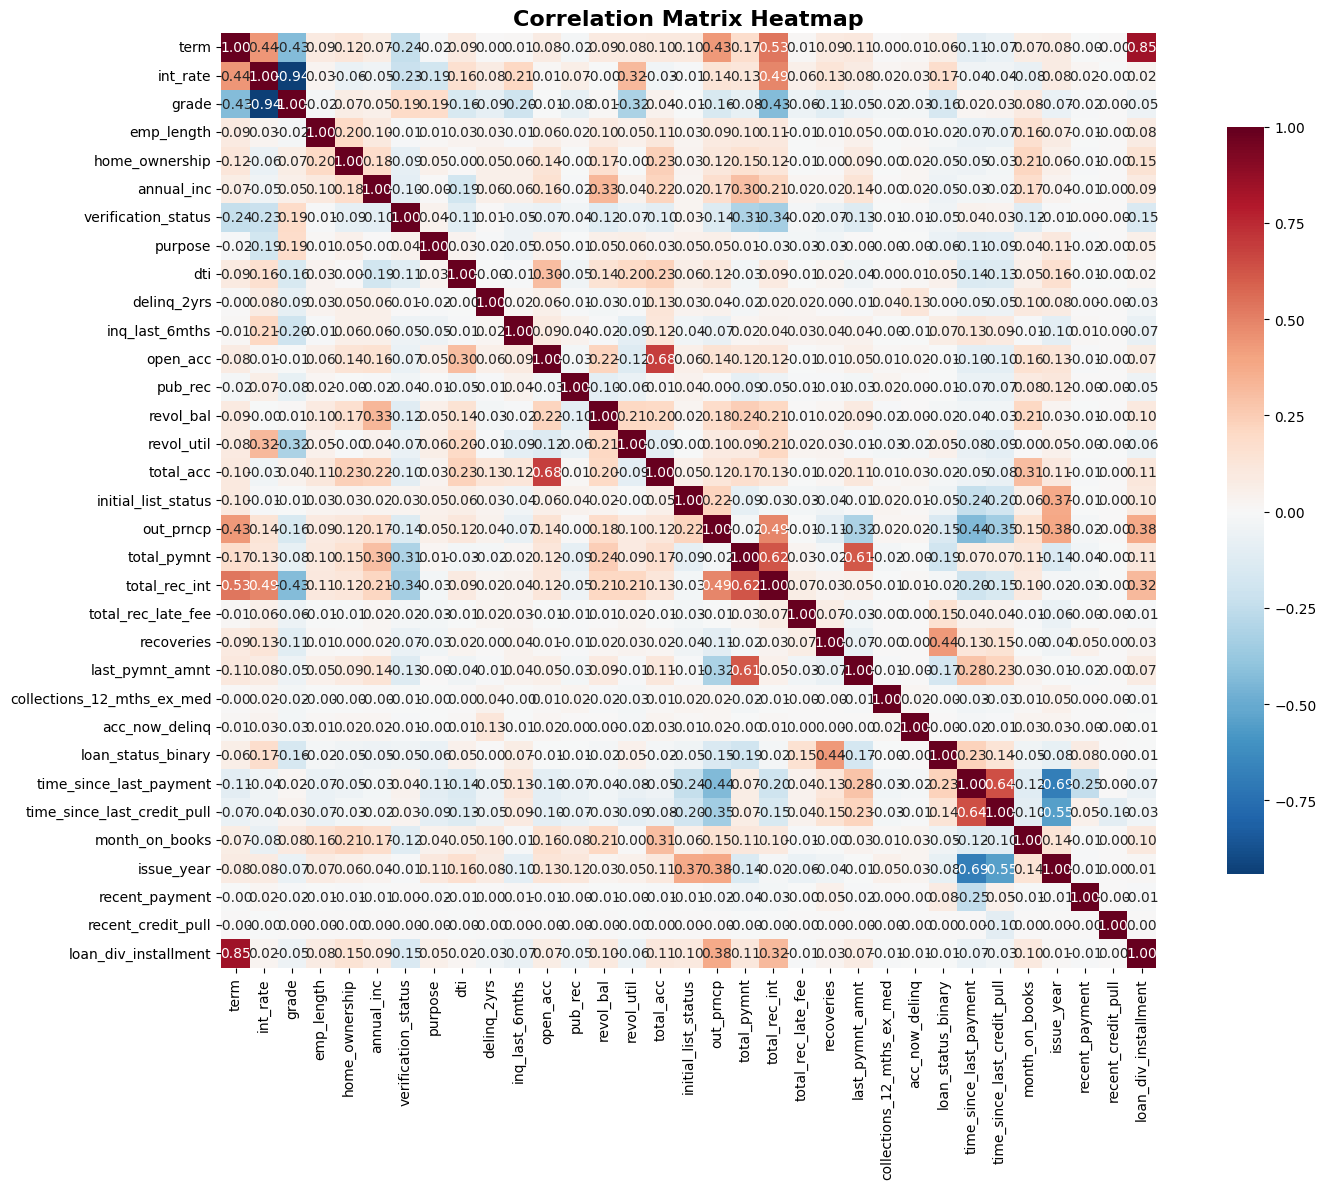

In [56]:
df_fin.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(df_fin.corr(), 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [55]:
df_fin

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_status_binary,time_since_last_payment,time_since_last_credit_pull,month_on_books,issue_year,recent_payment,recent_credit_pull,loan_div_installment
0,-0.616225,-0.729587,0.432937,1.138605,-1.162101,-0.896549,-1.249383,1.352635,1.328632,-0.357012,0.178920,-1.641544,-0.314290,-0.124888,1.160093,-1.384880,-0.734077,-0.693944,-0.687137,-0.695548,-0.123464,-0.154549,-0.531492,-0.083608,-0.058307,-0.354997,-0.017494,-0.509036,1.381119,-1.816959,-0.028408,-0.009491,-0.388613
1,1.622784,0.330634,-0.308391,-1.523744,-1.162101,-0.787386,0.272733,1.213069,-2.065791,-0.357012,3.843328,-1.641544,-0.314290,-0.703378,-1.971760,-1.815923,-0.734077,-0.693944,-1.274191,-0.867019,-0.123464,0.057470,-0.540846,-0.083608,-0.058307,2.816924,1.611841,2.594355,-0.535154,-1.816959,-0.028408,-0.009491,1.571529
2,-0.616225,0.488979,-0.308391,1.138605,-1.162101,-1.110292,1.140451,-4.456979,-1.082491,-0.357012,1.095022,-1.842050,-0.314290,-0.642003,1.783934,-1.298671,-0.734077,-0.693944,-1.032837,-0.799187,-0.123464,-0.154549,-0.445387,-0.083608,-0.058307,-0.354997,0.789329,-0.509036,-0.808908,-1.816959,-0.028408,-0.009491,-0.784630
3,-0.616225,-0.077850,-0.308391,1.138605,-1.162101,-0.438061,0.272733,-1.504424,0.354248,-0.357012,0.178920,-0.238000,-0.314290,-0.514224,-1.482803,1.028959,-0.734077,-0.693944,0.082948,-0.152728,3.099264,-0.154549,-0.498032,-0.083608,-0.058307,-0.354997,-0.017494,0.533041,-0.124524,-1.816959,-0.028408,-0.009491,-0.605700
4,1.622784,-0.261438,0.432937,-1.257509,-1.162101,0.122313,0.272733,-1.504424,0.091865,-0.357012,-0.737182,0.764532,-0.314290,0.558748,-0.096020,1.115168,-0.734077,-0.573268,-1.003980,-0.635962,-0.123464,-0.154549,-0.550184,-0.083608,-0.058307,-0.354997,-0.835523,-0.509036,-0.124524,-1.816959,-0.028408,-0.009491,2.008135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1.622784,0.147046,-0.308391,-0.458805,0.935806,0.668132,0.272733,-0.298377,0.335143,-0.357012,1.095022,1.366050,-0.314290,0.337479,0.902969,0.942751,1.362255,1.284633,-0.140017,0.792607,-0.123464,-0.154549,-0.484501,-0.083608,-0.058307,-0.354997,-0.835523,-0.509036,-0.672031,0.732170,-0.028408,-0.009491,1.703174
466281,1.622784,1.409214,-0.905057,1.138605,0.935806,0.085925,-1.249383,-0.298377,0.156824,-0.357012,3.843328,1.366050,1.643241,0.097107,-0.416371,0.425499,-0.734077,-0.693944,-0.830279,0.101539,-0.123464,-0.154549,-0.559237,-0.083608,-0.058307,2.816924,0.775882,-0.509036,0.149229,0.732170,-0.028408,-0.009491,0.861289
466282,1.622784,0.725348,-0.905057,0.339900,0.935806,-0.496282,-1.249383,-0.298377,1.073891,-0.357012,1.095022,1.366050,-0.314290,-0.461506,-0.214044,1.546210,-0.734077,1.576418,0.097185,1.402530,-0.123464,-0.154549,-0.469793,-0.083608,-0.058307,-0.354997,-0.835523,0.501636,-0.398278,0.732170,-0.028408,-0.009491,1.299354
466283,-0.616225,-1.360671,1.758035,-0.725040,-0.014617,0.176895,-1.249383,1.352635,-1.506635,3.405486,0.178920,1.967569,-0.314290,-0.233418,-1.461727,0.166874,1.362255,-0.693944,-1.138948,-0.991259,-0.123464,-0.154549,-0.292225,-0.083608,-0.058307,-0.354997,0.775882,0.524476,-0.672031,0.732170,-0.028408,-0.009491,-0.166769


In [60]:
x = df_fin.copy()
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print("Data splitting completed successfully!")
print(f"Training set: {x_train.shape[0]} samples")
print(f"Test set: {x_test.shape[0]} samples")

Data splitting completed successfully!
Training set: 349713 samples
Test set: 116572 samples


In [61]:
import pickle

with open('x_train.pkl','wb') as file:
    pickle.dump(x_train,file)

with open('x_test.pkl','wb') as file:
    pickle.dump(x_test,file)

with open('y_train.pkl','wb') as file:
    pickle.dump(y_train,file)

with open('y_test.pkl','wb') as file:
    pickle.dump(y_test,file)